# simple lin reg in python

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Advertising.csv")

In [1]:
#df.head()

In [5]:
# we can combine all three features into one as total spending

In [6]:
df["total_spend"] = df["TV"] + df["newspaper"] + df["radio"]

In [7]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales,total_spend
0,1,230.1,37.8,69.2,22.1,337.1
1,2,44.5,39.3,45.1,10.4,128.9
2,3,17.2,45.9,69.3,9.3,132.4
3,4,151.5,41.3,58.5,18.5,251.3
4,5,180.8,10.8,58.4,12.9,250.0


In [8]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
# lets see if they have linear relationship

<Axes: xlabel='total_spend', ylabel='sales'>

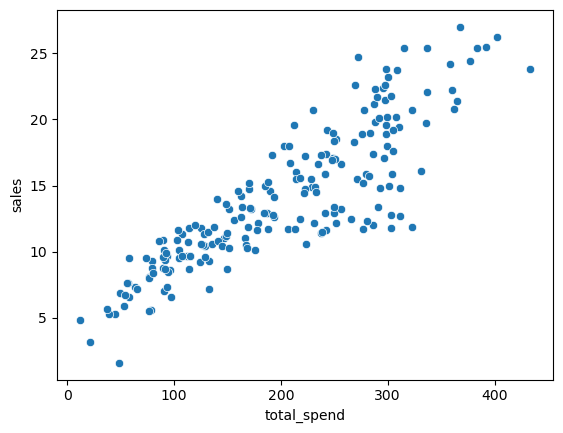

In [10]:
sns.scatterplot(data=df, x="total_spend", y="sales")

In [11]:
# seaborn already has best fit line with ordinary least squares

<Axes: xlabel='total_spend', ylabel='sales'>

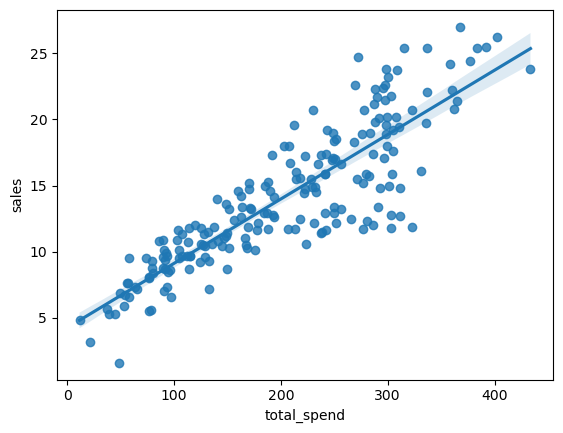

In [12]:
sns.regplot(data=df, x="total_spend", y="sales")

In [13]:
X = df["total_spend"]
y = df["sales"]

In [14]:
# we want to fit a line to this data using least squares
# y = mx +b
# here y = b1x + b0

In [15]:
help(np.polyfit)

Help on function polyfit in module numpy:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    .. note::
       This forms part of the old polynomial API. Since version 1.4, the
       new polynomial API defined in `numpy.polynomial` is preferred.
       A summary of the differences can be found in the
       :doc:`transition guide </reference/routines.polynomials>`.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error in the order `deg`, `deg-1`, ... `0`.
    
    The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
    method is recommended for new code as it is more stable numerically. See
    the documentation of the method for more information.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y : array_

In [16]:
# this actually can do polynomial reg, but we only want lin , so specify degree as 1

In [17]:
np.polyfit(X,y,deg=1)

array([0.04868788, 4.24302822])

In [18]:
# these are the b1 and b0 values
# hence we can predict

# now lets take some values on the line and predict 

In [19]:
potential_spend = np.linspace(0,500,100)  # 100 values in btw 0 and 500

In [20]:
potential_sales = 0.04868788*potential_spend + 4.24302822

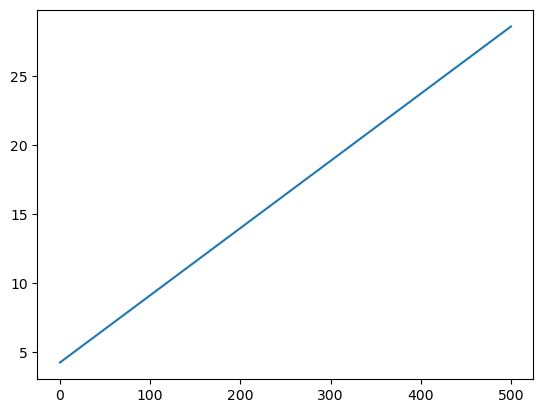

In [21]:
plt.plot(potential_spend, potential_sales)

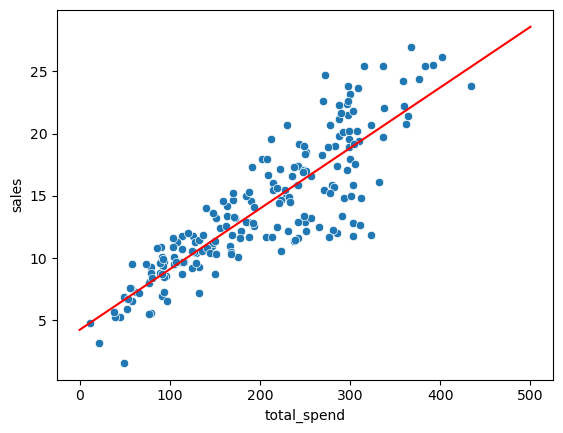

In [22]:
sns.scatterplot(x="total_spend", y="sales", data=df)
plt.plot(potential_spend, potential_sales, color="red")


In [23]:
# this is exactly same as what seaborn did

In [24]:
# if spend is 200 lets see what it line suggests
spend=200

potential_sale = 0.04868788*spend + 4.24302822

potential_sale

13.98060422

## lets see if we can do for polynomial reg, we just have to pass deg=3

In [25]:
np.polyfit(X,y,deg=3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [26]:
# it gave 4 values bcuz it fit a 3rd degree polynomial
# y = b3x**3 + b2x**2 + b1x + b0

# we can fit a lin better 

In [27]:
# to understand look at the coeff for x**3 and x**2 terms they are very very small

In [28]:
pot_spend = np.linspace(0,500,100)

In [29]:
pred_sales = 3.07615033e-07*(pot_spend)**3 + (-1.89392449e-04)*(pot_spend)**2 + 8.20886302e-02*pot_spend + 2.70495053e+00

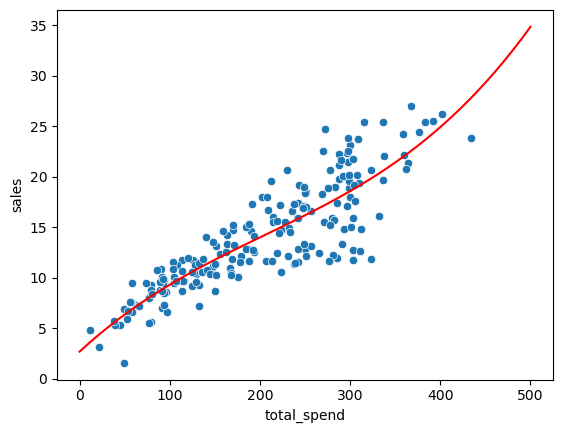

In [30]:
sns.scatterplot(x="total_spend", y="sales", data=df)
plt.plot(pot_spend, pred_sales, color="red")


## how do we know which fit is better, lin or poly (3 deg here)?

# Remember still we are only dealing with one feature in all of this

In [31]:
## to deal with multi feat you need grad descent ,etc

# scikit learn

## train test split

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y)   # this is just tuple unpacking

## implementing it in scikit learn, with multi features

In [42]:
del df["total_spend"]

In [43]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [44]:
# create subplots for each of feature with the sales to see if there is lin correlation between them, not doing it here, but its a good practice to 
# it before and knowing our data 

In [45]:
# instead of using matplotlib, seaborn has something in built with gives much more information too


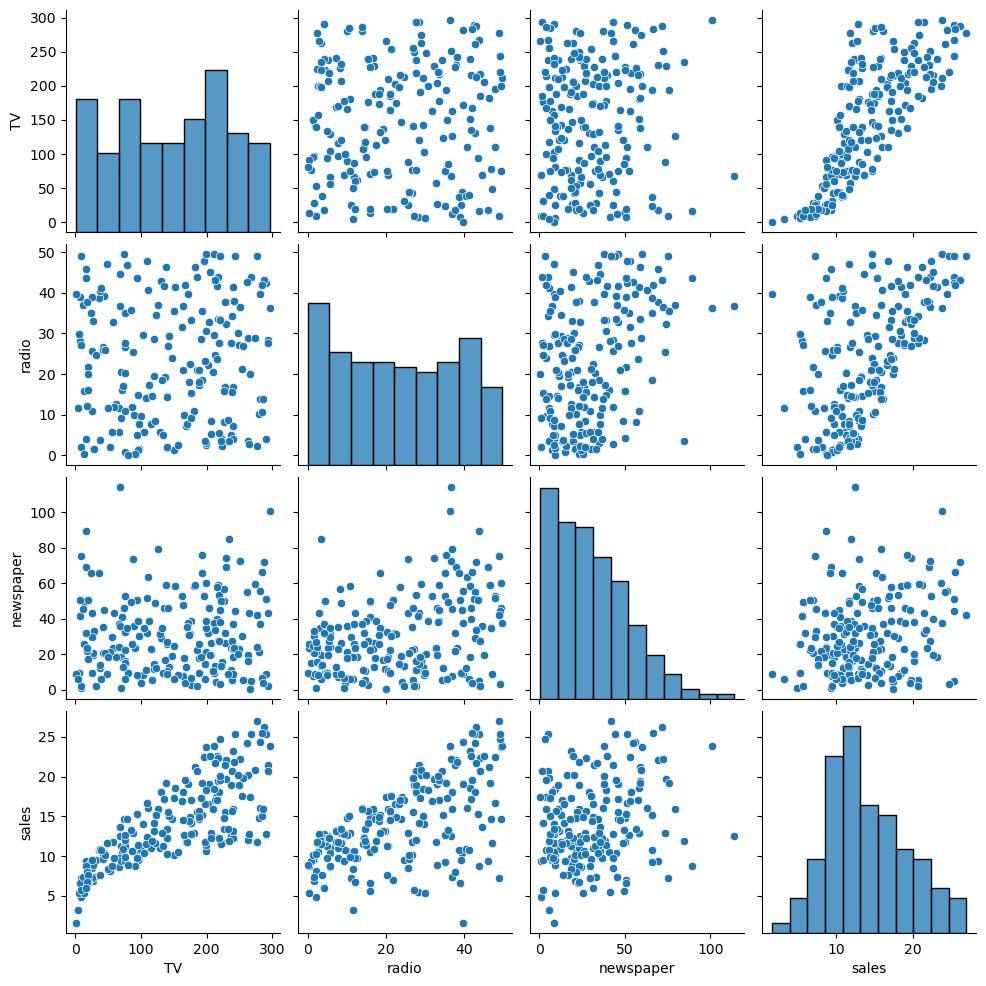

In [46]:
sns.pairplot(df)

In [47]:
# this will be much more useful in polynomial reg cases

In [48]:
X = df.drop("sales", axis=1)

In [49]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [51]:
y = df["sales"]
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

In [54]:
# documentation also has an example too 

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [56]:
len(df)

200

In [58]:
X_train

,TV,radio,newspaper
85,193.2,18.4,65.7
183,287.6,43.0,71.8
127,80.2,0.0,9.2
53,182.6,46.2,58.7
100,222.4,4.3,49.8
...,...,...,...
63,102.7,29.6,8.4
70,199.1,30.6,38.7
81,239.8,4.1,36.9
11,214.7,24.0,4.0


In [61]:
y_train

85     15.2
183    26.2
127     8.8
53     21.2
100    11.7
       ... 
63     14.0
70     18.3
81     12.3
11     17.4
95     16.9
Name: sales, Length: 140, dtype: float64

In [63]:
# see index positions are not changed, so that we can match it with x_test and y_test in the evaluation part 

In [64]:
len(X_test)

60

In [65]:
# hence 30 percent is split

## creating a model , i.e creating an estimator in sklearn


In [67]:
from  sklearn.linear_model import LinearRegression

In [69]:
#help(LinearRegression)

In [70]:
model = LinearRegression()  # we are creating an instance of model

In [71]:
model.fit(X_train,y_train)

LinearRegression()

In [72]:
model.predict(X_test)

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

## performance evaluation

## specifically regression metrics

## remember these are good for regression tasks, not just linear regression

In [75]:
# we need metrics designed for continuoius values

In [77]:
# model.predict(X_test) # predict on x test and compare with y_test

In [78]:
X_test.head()

,TV,radio,newspaper
37,74.7,49.4,45.7
109,255.4,26.9,5.5
31,112.9,17.4,38.6
89,109.8,47.8,51.4
66,31.5,24.6,2.2


In [79]:
y_test.head()

37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
Name: sales, dtype: float64

In [80]:
test_predictions = model.predict(X_test)

In [81]:
test_predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [82]:
 from sklearn.metrics import mean_absolute_error, mean_squared_error

In [83]:
# for root mean square, we can take the root of mean_squared_error

In [84]:
df["sales"].mean()

14.0225

<Axes: xlabel='sales', ylabel='Count'>

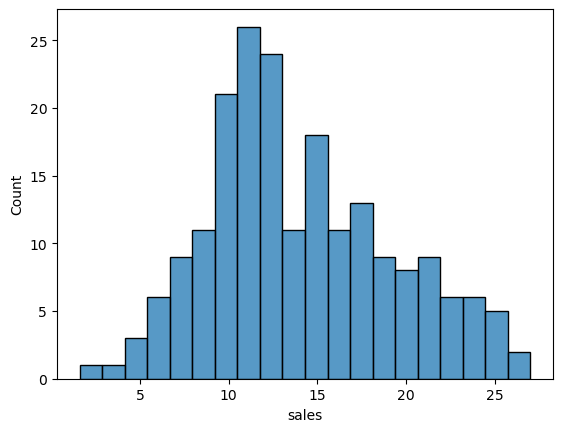

In [86]:
sns.histplot(data=df, x="sales", bins=20)

In [87]:
mean_absolute_error(y_test,test_predictions)

1.213745773614481

In [88]:
mean_squared_error(y_test,test_predictions)

2.29871669788638

In [89]:
# you cant directly compare MSE to mean as units are different , so take root , i.e RMSE

In [90]:
# RMSE calculation

In [91]:
np.sqrt(mean_squared_error(y_test,test_predictions))

1.5161519375993884

## residual plots

In [92]:
test_residuals = y_test - test_predictions

In [94]:
#test_residuals

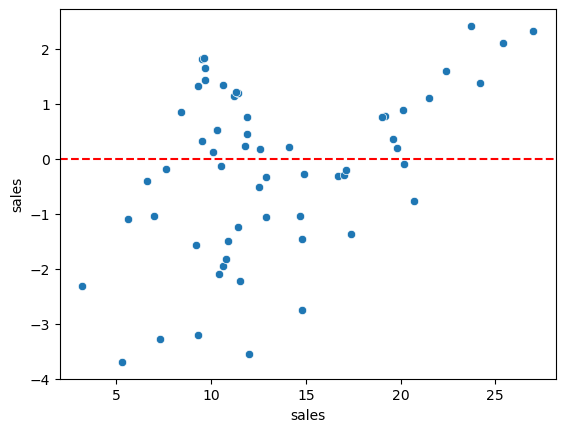

In [96]:
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color="red", ls="--")

In [97]:
# hence no clear line or curve 

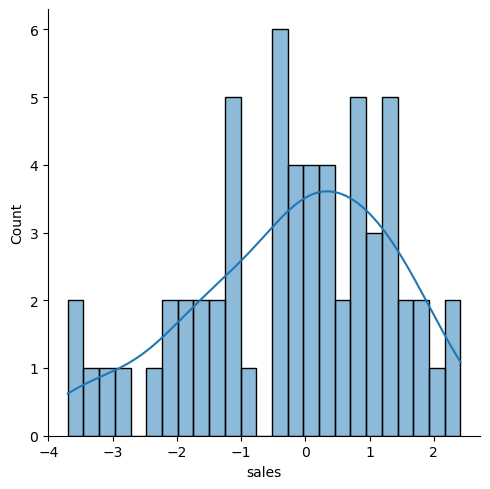

In [98]:
sns.displot(test_residuals, bins=25, kde=True)

In [99]:
# dist is just slightly skewed, so no worries

## But the ultimate way to conclude is by residual plots

In [100]:
# look more into probability plot using scipy, to know if our distribution follows normal distribution

## saving and loading the model

In [102]:
final_model = LinearRegression()

In [103]:
final_model.fit(X,y)

LinearRegression()

In [104]:
# see we passed in the whole data set, bcuz we concluded our model is good with training data

In [105]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [106]:
# this gives the coefficients ( here 3 beta coefficients)

In [107]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [108]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

## see the third coeff is almost zero, and actually it is even negative, i.e spending money on newspaper ads actually slightly decreases our sales!!

## this as a hint was already seen before when we plotted all three separately vs sales

In [110]:
from joblib import dump,load

In [111]:
dump(final_model, "final_sales_model.joblib")

['final_sales_model.joblib']

In [112]:
# this will save our model with that name

In [113]:
# to load our model

In [114]:
loaded_model = load("final_sales_model.joblib")

In [115]:
# we can see coeff using coeff_ method

In [116]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [117]:
# these coeff will be exactly same as our final model, as both of them are same

In [118]:
## lets see if we run a campaign of some no of Tv , radio, newspaper ads, the sales we might expect

In [119]:
X.shape

(200, 3)

In [123]:
# 149 units of TV,23 units of radio , 43 units of newspaper ads

campaign = [[149,23,43]]

In [124]:
loaded_model.predict(campaign)

C:\Users\likhi\anaconda3\envs\bootcamp\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([14.04939973])

## so we can expect this much sales with our campaign

## remember this prediction has same error as our model, we dont have any way of saying if this will be exactly the case
## but it will be within the error range of our model 

# POLYNOMIAL REGRESSION

In [4]:
# scikit learn preprocessing library

# one tool in it is "PolynomialFeatures".

In [5]:
df = pd.read_csv("Advertising.csv")

In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
X = df.drop("sales",axis=1)

In [9]:
y = df["sales"]

In [10]:
from sklearn.preprocessing import PolynomialFeatures

In [11]:
# framework is similar to how we use other models in sklearn

# first we create an instance and so on

In [12]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

# corrently we dont want the bias term, hence False

In [13]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [14]:
polynomial_converter.transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [15]:
polynomial_converter.transform(X).shape

(200, 9)

In [16]:
# see, it transformed (added our required terms) the data

In [17]:
poly_features = polynomial_converter.transform(X)

In [18]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [19]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

## see the first three terms are actually the original terms, it also has three interaction terms and three square terms

# remeber these are not in order but u can calculate and verify that infact all these terms are present

## we can do fit and transform in a single step using, .fit_transform()

# hence now we can use lin reg on this poly feat data, which is essentially polynomial reg

In [20]:
poly_features.shape

(200, 9)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)


# remeber now our data is poly_features not X. also same test size and random state, so we can compare with our previous lin reg model

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression()

In [25]:
model.fit(X_train,y_train)

LinearRegression()

In [26]:
# remember this is training on 9 features

In [27]:
test_predictions = model.predict(X_test)

In [28]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [29]:
# .predict also takes 9 values, so we have to pass X-test which has 9 values

# verify this by using the .coef_ method

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [31]:
MAE = mean_absolute_error(y_test,test_predictions)

In [32]:
MSE = mean_squared_error(y_test,test_predictions)

In [33]:
RMSE = np.sqrt(MSE)

In [34]:
MAE

0.48967980448035603

In [35]:
RMSE

0.6646431757269019

## previous lin reg model performance was MAE = 1.213 and RMSE = 1.516

## remeber to actually correctly predict both models we have tp perform exact same train test split ratio and same random state value
## we actually did this in our split step

In [36]:
# Our poly feat model is performing better

In [37]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [38]:
model.coef_   # beta coefficients for our model

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [39]:
# we can see that the last coeff is extremely small, which is newspaper squared (calculate to see it infact is that)

## we can see this bcuz for prev model, we saw newspaper feat is not much important, hence square of it is also not
## also we can see strong beta coeff values for interaction terms, i.e theres a lot of synergy in advertising methods

# underfit vs overfit

In [40]:
# we do this by using a loop, see notes for the 5 steps that we do

In [41]:
train_rmse_errors = []
test_rmse_errors = []


for degreeee in range(1,10):
    
    poly_converter = PolynomialFeatures(degree=degreeee, include_bias=False)
    
    poly_features = poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train,train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test,test_pred))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)


In [42]:
train_rmse_errors

[1.734594124329376,
 0.5879574085292231,
 0.43393443569020657,
 0.3517083688399348,
 0.2509342962728227,
 0.1994556133865361,
 5.418481285535737,
 0.1508621033579802,
 0.17175170448632276]

## see a spike in higher poly, which is a red flag that u shouldn't go for this high polynomial, even after that too if fell down a lot, so extreme overfitting is happening

## this is more apparent for test_rmse_errors

In [43]:
test_rmse_errors

[1.5161519375993877,
 0.6646431757269019,
 0.5803286825231682,
 0.5077742656422755,
 2.575808121294812,
 4.263812349320766,
 1383.4052620420694,
 3733.4225752445113,
 95489.26452707677]

<function matplotlib.pyplot.legend(*args, **kwargs)>

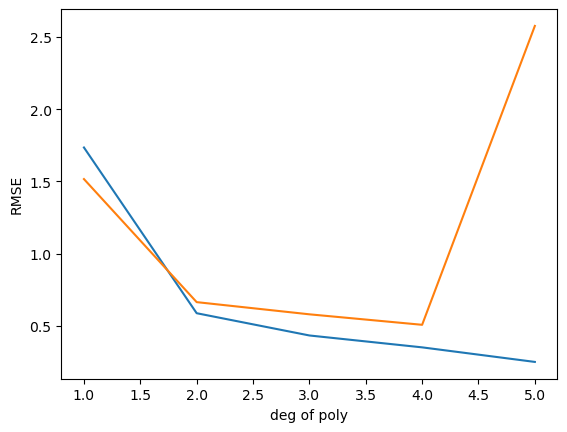

In [44]:
plt.plot(range(1,6),train_rmse_errors[:5],label="TRAIN RMSE")  # i.e we are only plotting first 5 data points
plt.plot(range(1,6),test_rmse_errors[:5],label="TEST RMSE")

plt.ylabel("RMSE")
plt.xlabel("deg of poly")
plt.legend

In [45]:
# we only plotted first 5 data points bcuz if we plot all 10, we might not see where its shooting porperly 
# as higher deg rmse will be so big it just makes lower rmse not clearly visible, i.e

<function matplotlib.pyplot.legend(*args, **kwargs)>

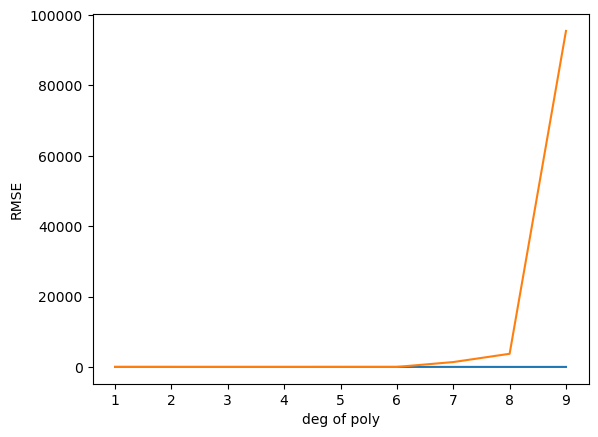

In [46]:
plt.plot(range(1,10),train_rmse_errors,label="TRAIN RMSE")  # i.e we are only plotting first 5 data points
plt.plot(range(1,10),test_rmse_errors,label="TEST RMSE")

plt.ylabel("RMSE")
plt.xlabel("deg of poly")
plt.legend

In [47]:
# see it appears as if its shooting at 6 or 7th degree



<function matplotlib.pyplot.legend(*args, **kwargs)>

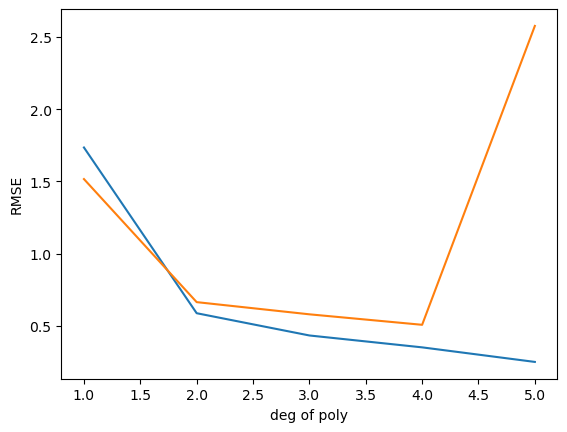

In [48]:
plt.plot(range(1,6),train_rmse_errors[:5],label="TRAIN RMSE")  # i.e we are only plotting first 5 data points
plt.plot(range(1,6),test_rmse_errors[:5],label="TEST RMSE")

plt.ylabel("RMSE")
plt.xlabel("deg of poly")
plt.legend

## what deg should we choose? 2,3 or 4?

## this is where domain knowledge is needed and is it necesary that 4th degree model complexity is needed??
## choosing 2nd degree or maybe 3rd degree is the way to go given the context of the way we are working 

# polynomial model deployment

In [49]:
# lets say we chode a third degree polynomial 

In [50]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)

In [51]:
final_model = LinearRegression()

In [52]:
full_converted_X = final_poly_converter.fit_transform(X)

final_model.fit(full_converted_X,y)

LinearRegression()

In [53]:
# i.e we want full_converted_X as our data

In [54]:
from joblib import dump,load

## we want to save both model and the converter

In [56]:
dump(final_model,"final_poly_model.joblib"

['final_poly_model.joblib']

In [57]:
dump(final_poly_converter,"final_converter.joblib")

['final_converter.joblib']

### to use them again

In [58]:
loaded_converter = load("final_converter.joblib")

In [59]:
loaded_model = load("final_poly_model.joblib")

In [60]:
# lets say data for new campaign

campaign = [[149,22,12]]

In [61]:
### we cant pass this data directly as pur model expects more features as its 3rd degrre poly.

### remember for 2nd deg we had 9 features, here its 3rd so expects even more

In [62]:
loaded_converter.fit_transform(campaign)

array([[1.490000e+02, 2.200000e+01, 1.200000e+01, 2.220100e+04,
        3.278000e+03, 1.788000e+03, 4.840000e+02, 2.640000e+02,
        1.440000e+02, 3.307949e+06, 4.884220e+05, 2.664120e+05,
        7.211600e+04, 3.933600e+04, 2.145600e+04, 1.064800e+04,
        5.808000e+03, 3.168000e+03, 1.728000e+03]])

## this is why we need to dump/export the converter too

### now we can pass into the model

In [64]:
loaded_converter.fit_transform(campaign).shape

(1, 19)

## see, our model actually expects 19 features, u can verify this 

In [63]:
transformed_data = loaded_converter.fit_transform(campaign)

In [65]:
loaded_model.predict(transformed_data)

array([14.64501014])

# regularization

# Feature scaling